Twitter Sentiment Analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/vineetdhanawat/twitter-sentiment-analysis/master/datasets/Sentiment%20Analysis%20Dataset.csv",encoding='latin-1')
df.head(10)
#utf-8 code error usually comes when the range of numeric values exceeding 0 to 127.
#In order to to overcome this we have a set of encodings, the most widely used is "Latin-1

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [5]:
#preprocessing
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [6]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['SentimentText'], "@[\w]*")

In [7]:
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...


In [8]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...


In [9]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,friend
1,2,0,I missed the New Moon trail...,missed Moon trailer
2,3,1,omg its already 7:30 :O,already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...
4,5,0,i think mi bf is cheating on me!!! ...,think cheating


In [10]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                             [friend]
1                              [missed, Moon, trailer]
2                                            [already]
3    [Omgaga, sooo, gunna, been, this, dentist, sin...
4                                    [think, cheating]
Name: clean_tweet, dtype: object

In [11]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0                                             [friend]
1                                [miss, moon, trailer]
2                                            [alreadi]
3    [omgaga, sooo, gunna, been, thi, dentist, sinc...
4                                       [think, cheat]
Name: clean_tweet, dtype: object

In [12]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,friend
1,2,0,I missed the New Moon trail...,miss moon trailer
2,3,1,omg its already 7:30 :O,alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna been thi dentist sinc supos ...
4,5,0,i think mi bf is cheating on me!!! ...,think cheat


In [13]:
!pip install wordcloud

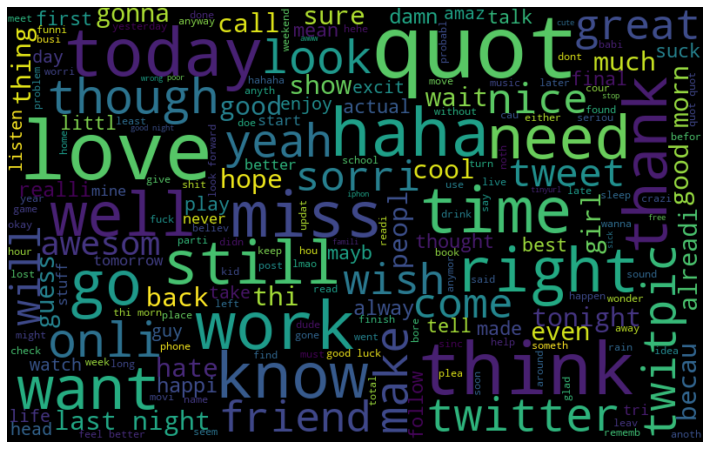

In [14]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

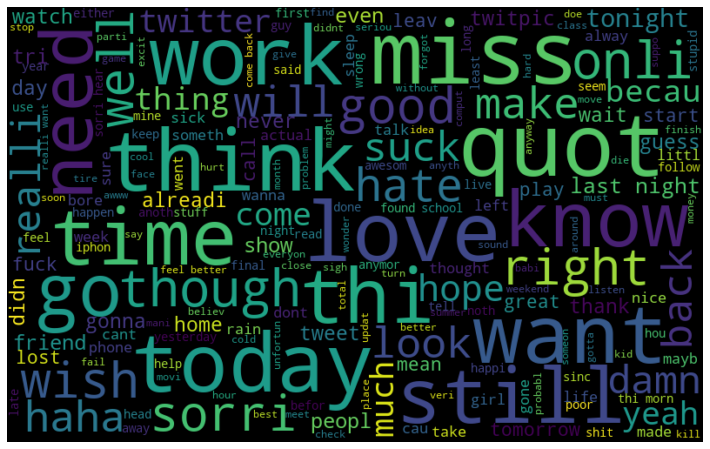

In [15]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


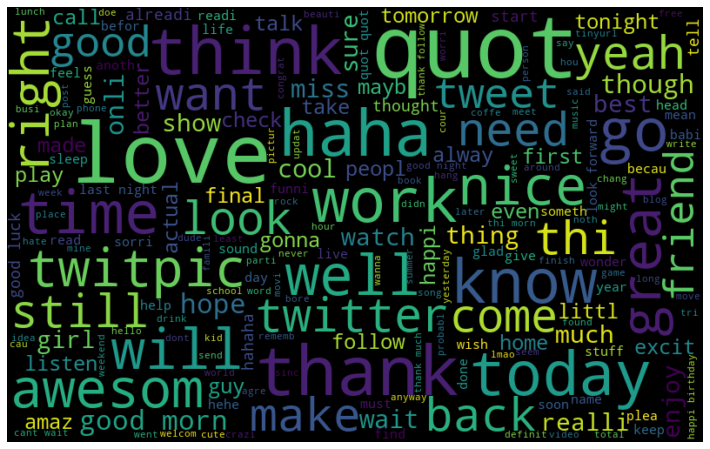

In [16]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
# extract hashtags from non-racist tweets
ht_happy = hashtag_extract(df['clean_tweet'][df['Sentiment']==1])

# extract hashtags from racist tweets
ht_sad = hashtag_extract(df['clean_tweet'][df['Sentiment']==0])

In [19]:
ht_happy = sum(ht_happy, [])
ht_sad = sum(ht_sad, [])

In [38]:
happy = ht_happy
y1 = len(ht_happy)
y1

15332

In [39]:
sad = ht_sad
y2 = len(ht_sad)
y2

9880

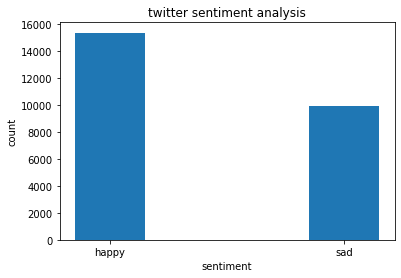

In [41]:
import matplotlib.pyplot as plt
x = ['happy','sad']
y = [y1,y2]
plt.bar(x,y,width=0.3)
plt.xlabel("sentiment")
plt.ylabel("count")
plt.title("twitter sentiment analysis")
plt.show()


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf, df['Sentiment'], random_state=42, test_size=0.25)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [45]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.7582312141897635

In [47]:
accuracy_score(y_test,pred)

0.730865478515625